In [2]:
!pip install gdown
!pip install tensorflow-gpu

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: /Users/aryaanmehra/Desktop/ML:Data_Science/Project - Anomaly detection in S&P 500 data/london_bike_sharing.csv
100%|██████████████████████████████████████| 1.03M/1.03M [00:00<00:00, 1.40MB/s]


In [5]:
df = pd.read_csv(
  "london_bike_sharing.csv",
  parse_dates=['timestamp'],
  index_col="timestamp"
)

print(df.head())
print(df.shape)

                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
(17414, 9)


In [6]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

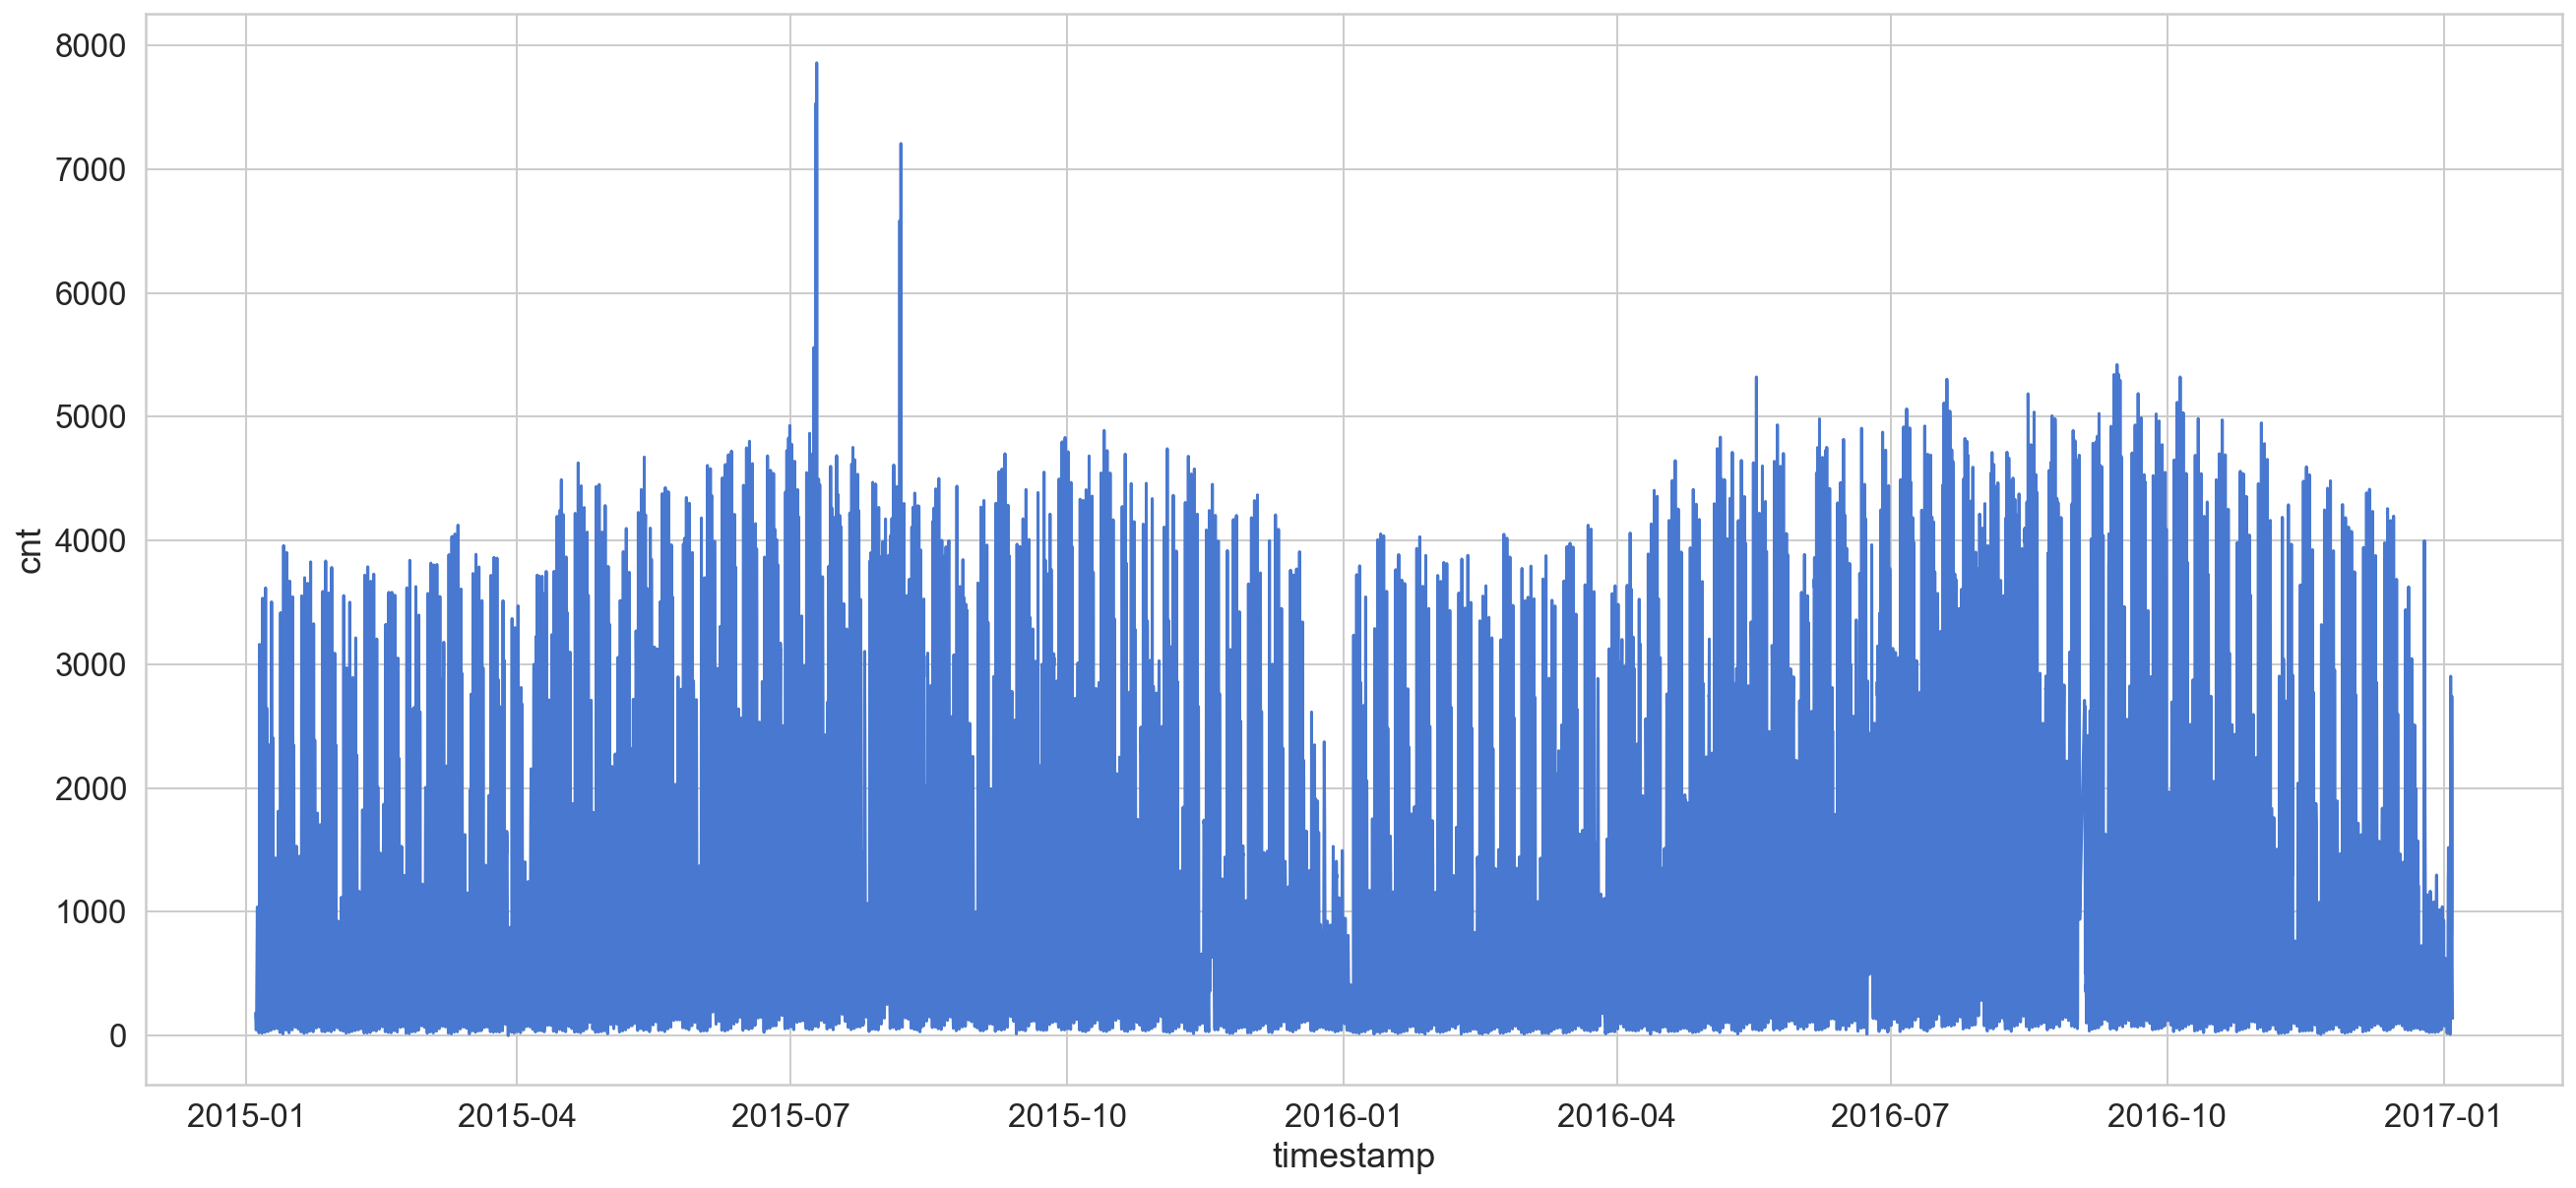

In [7]:
sns.lineplot(x=df.index, y="cnt", data=df);

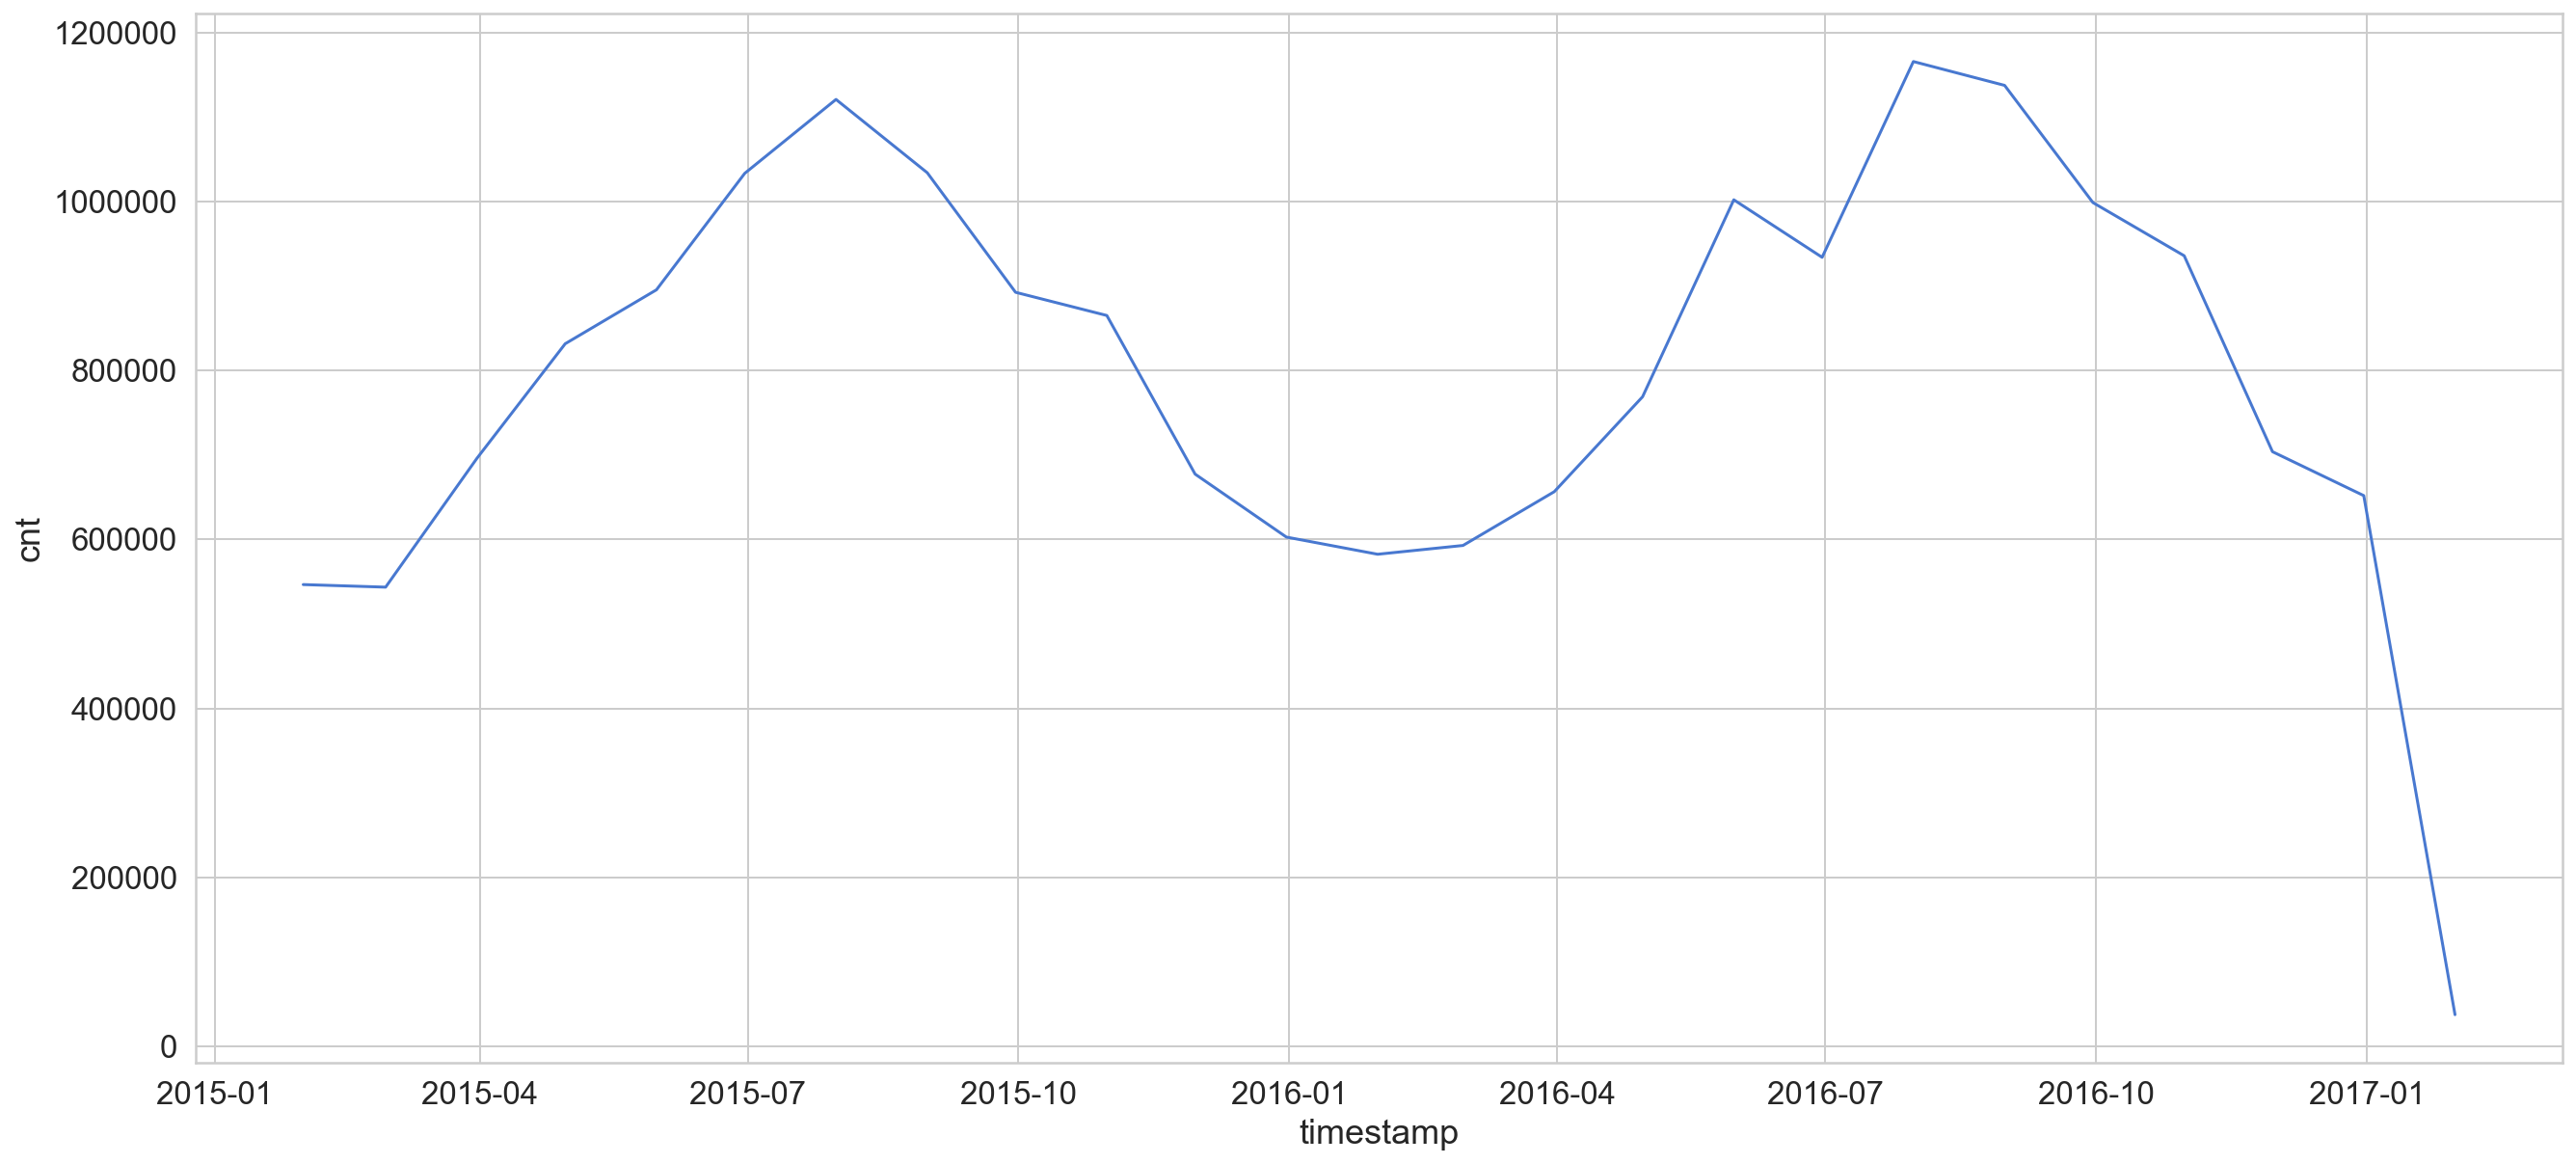

In [8]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month)

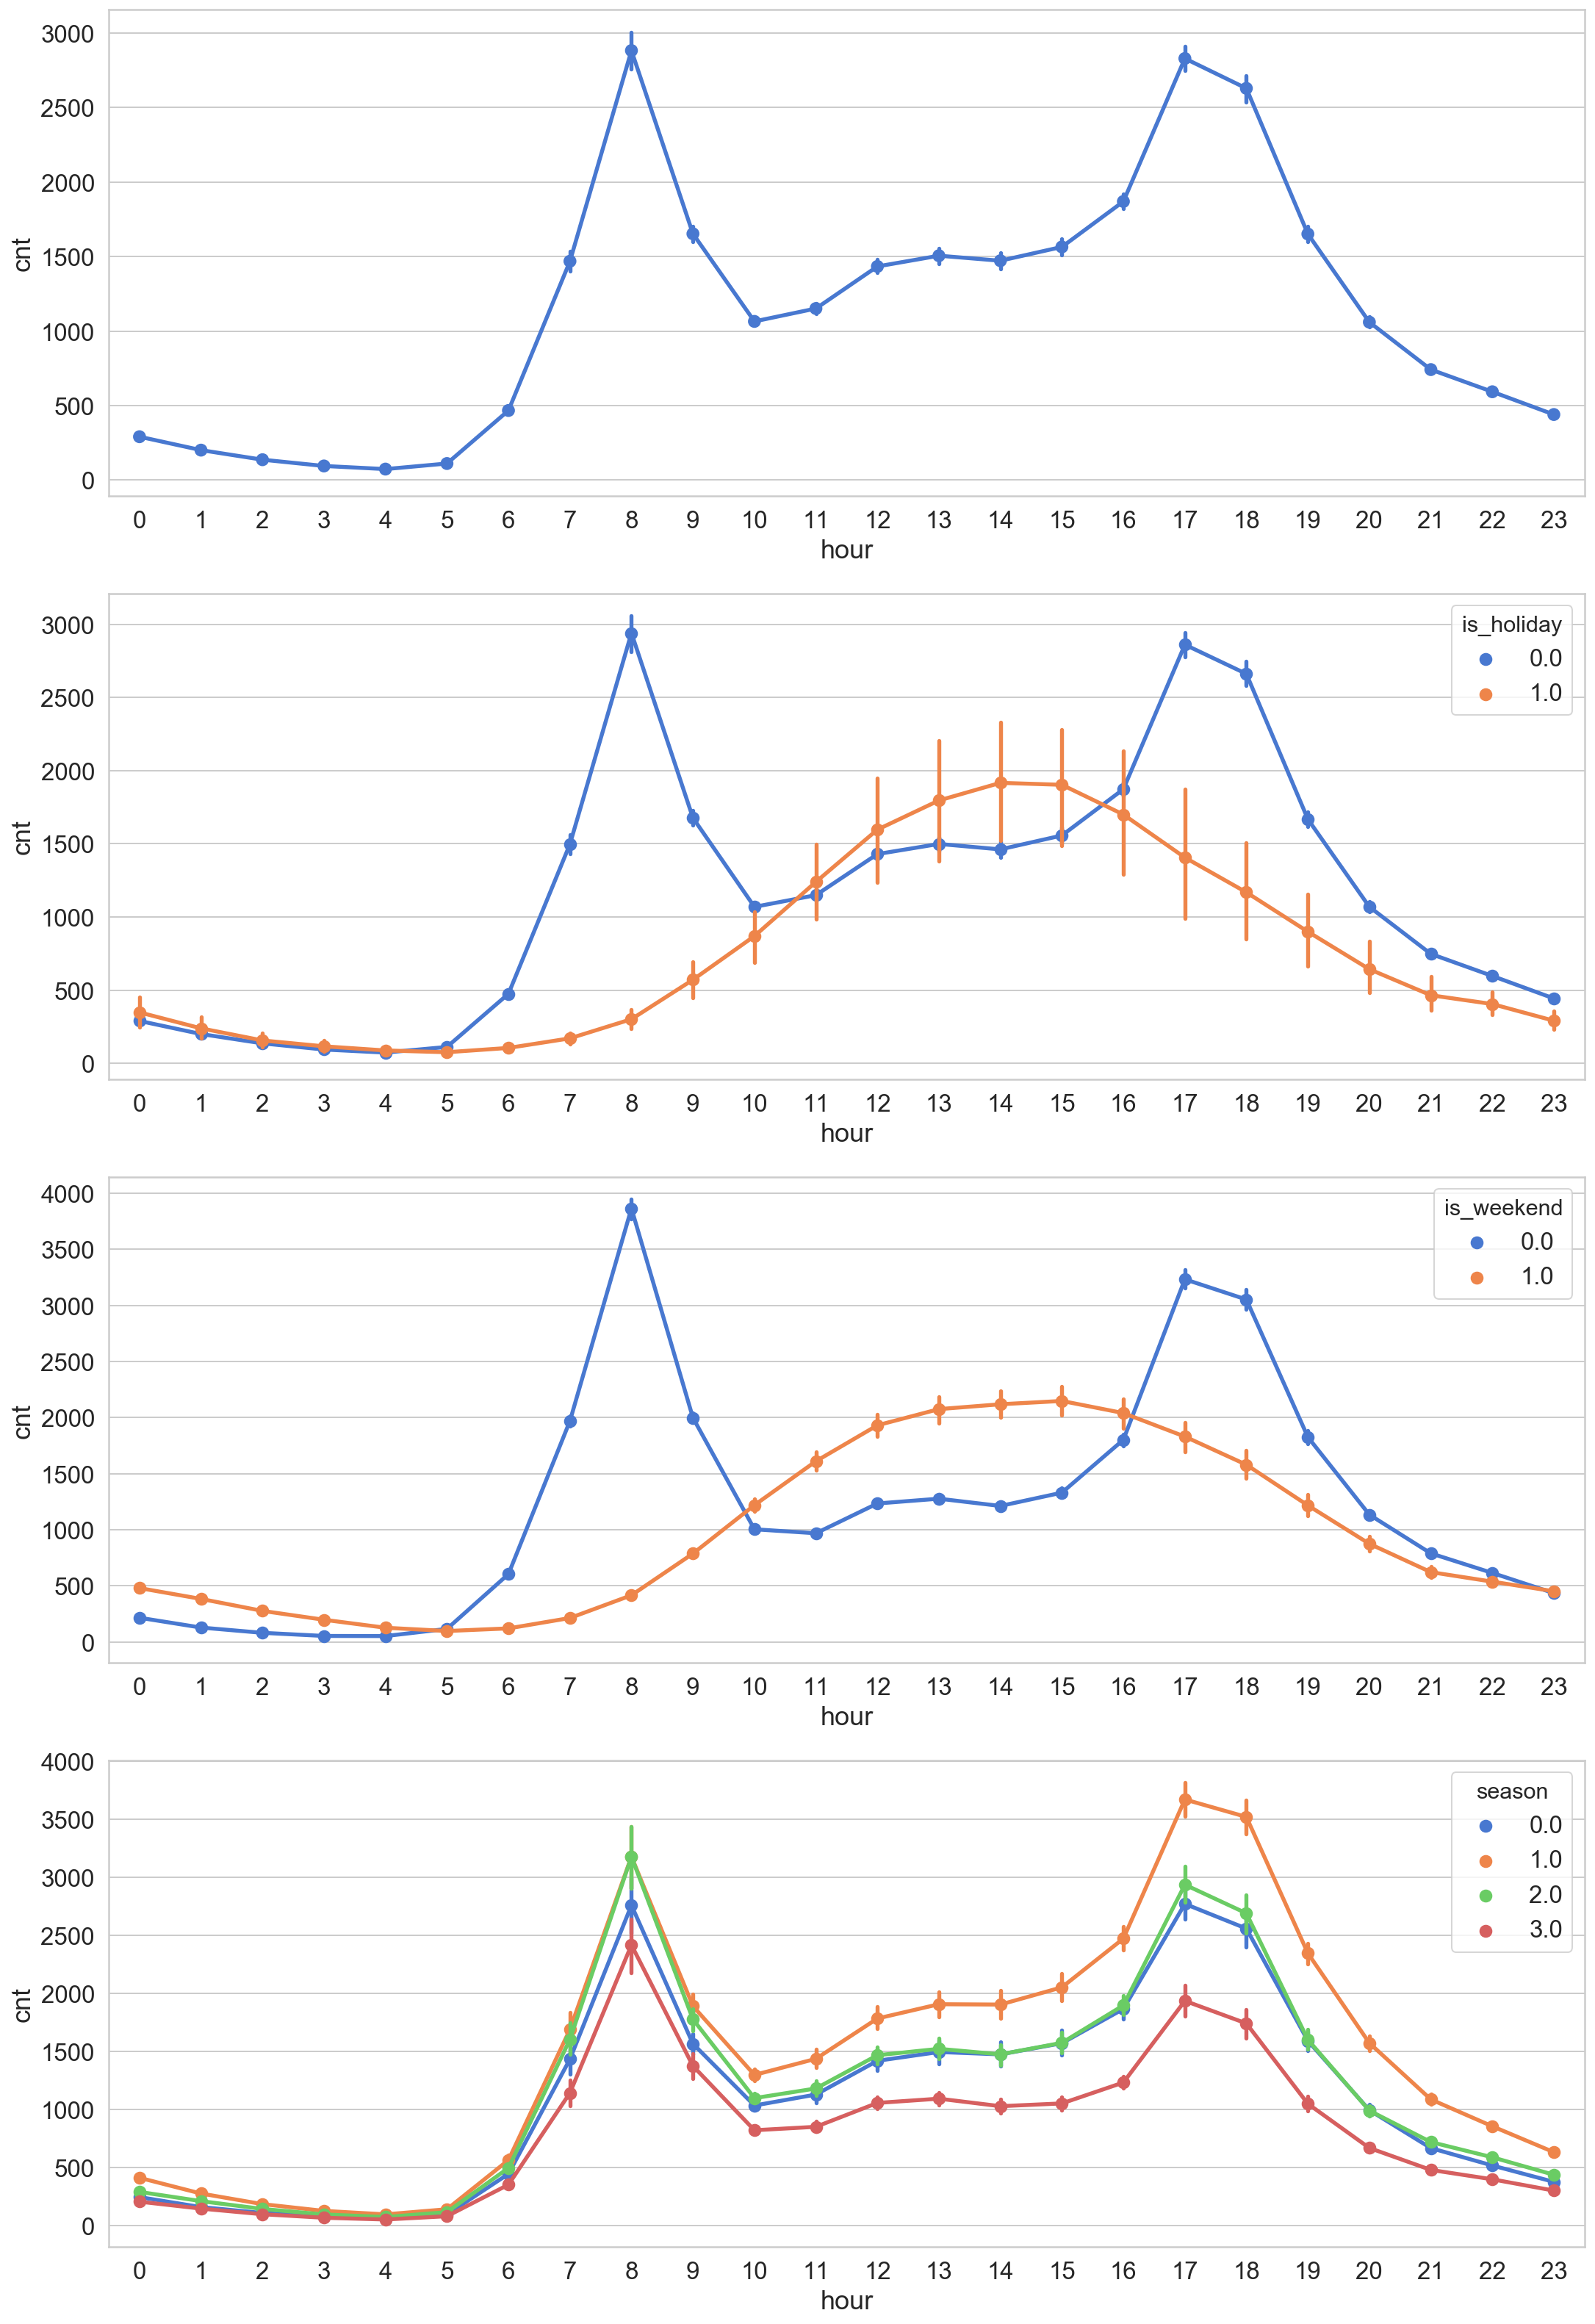

In [9]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18, 28)

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax4);

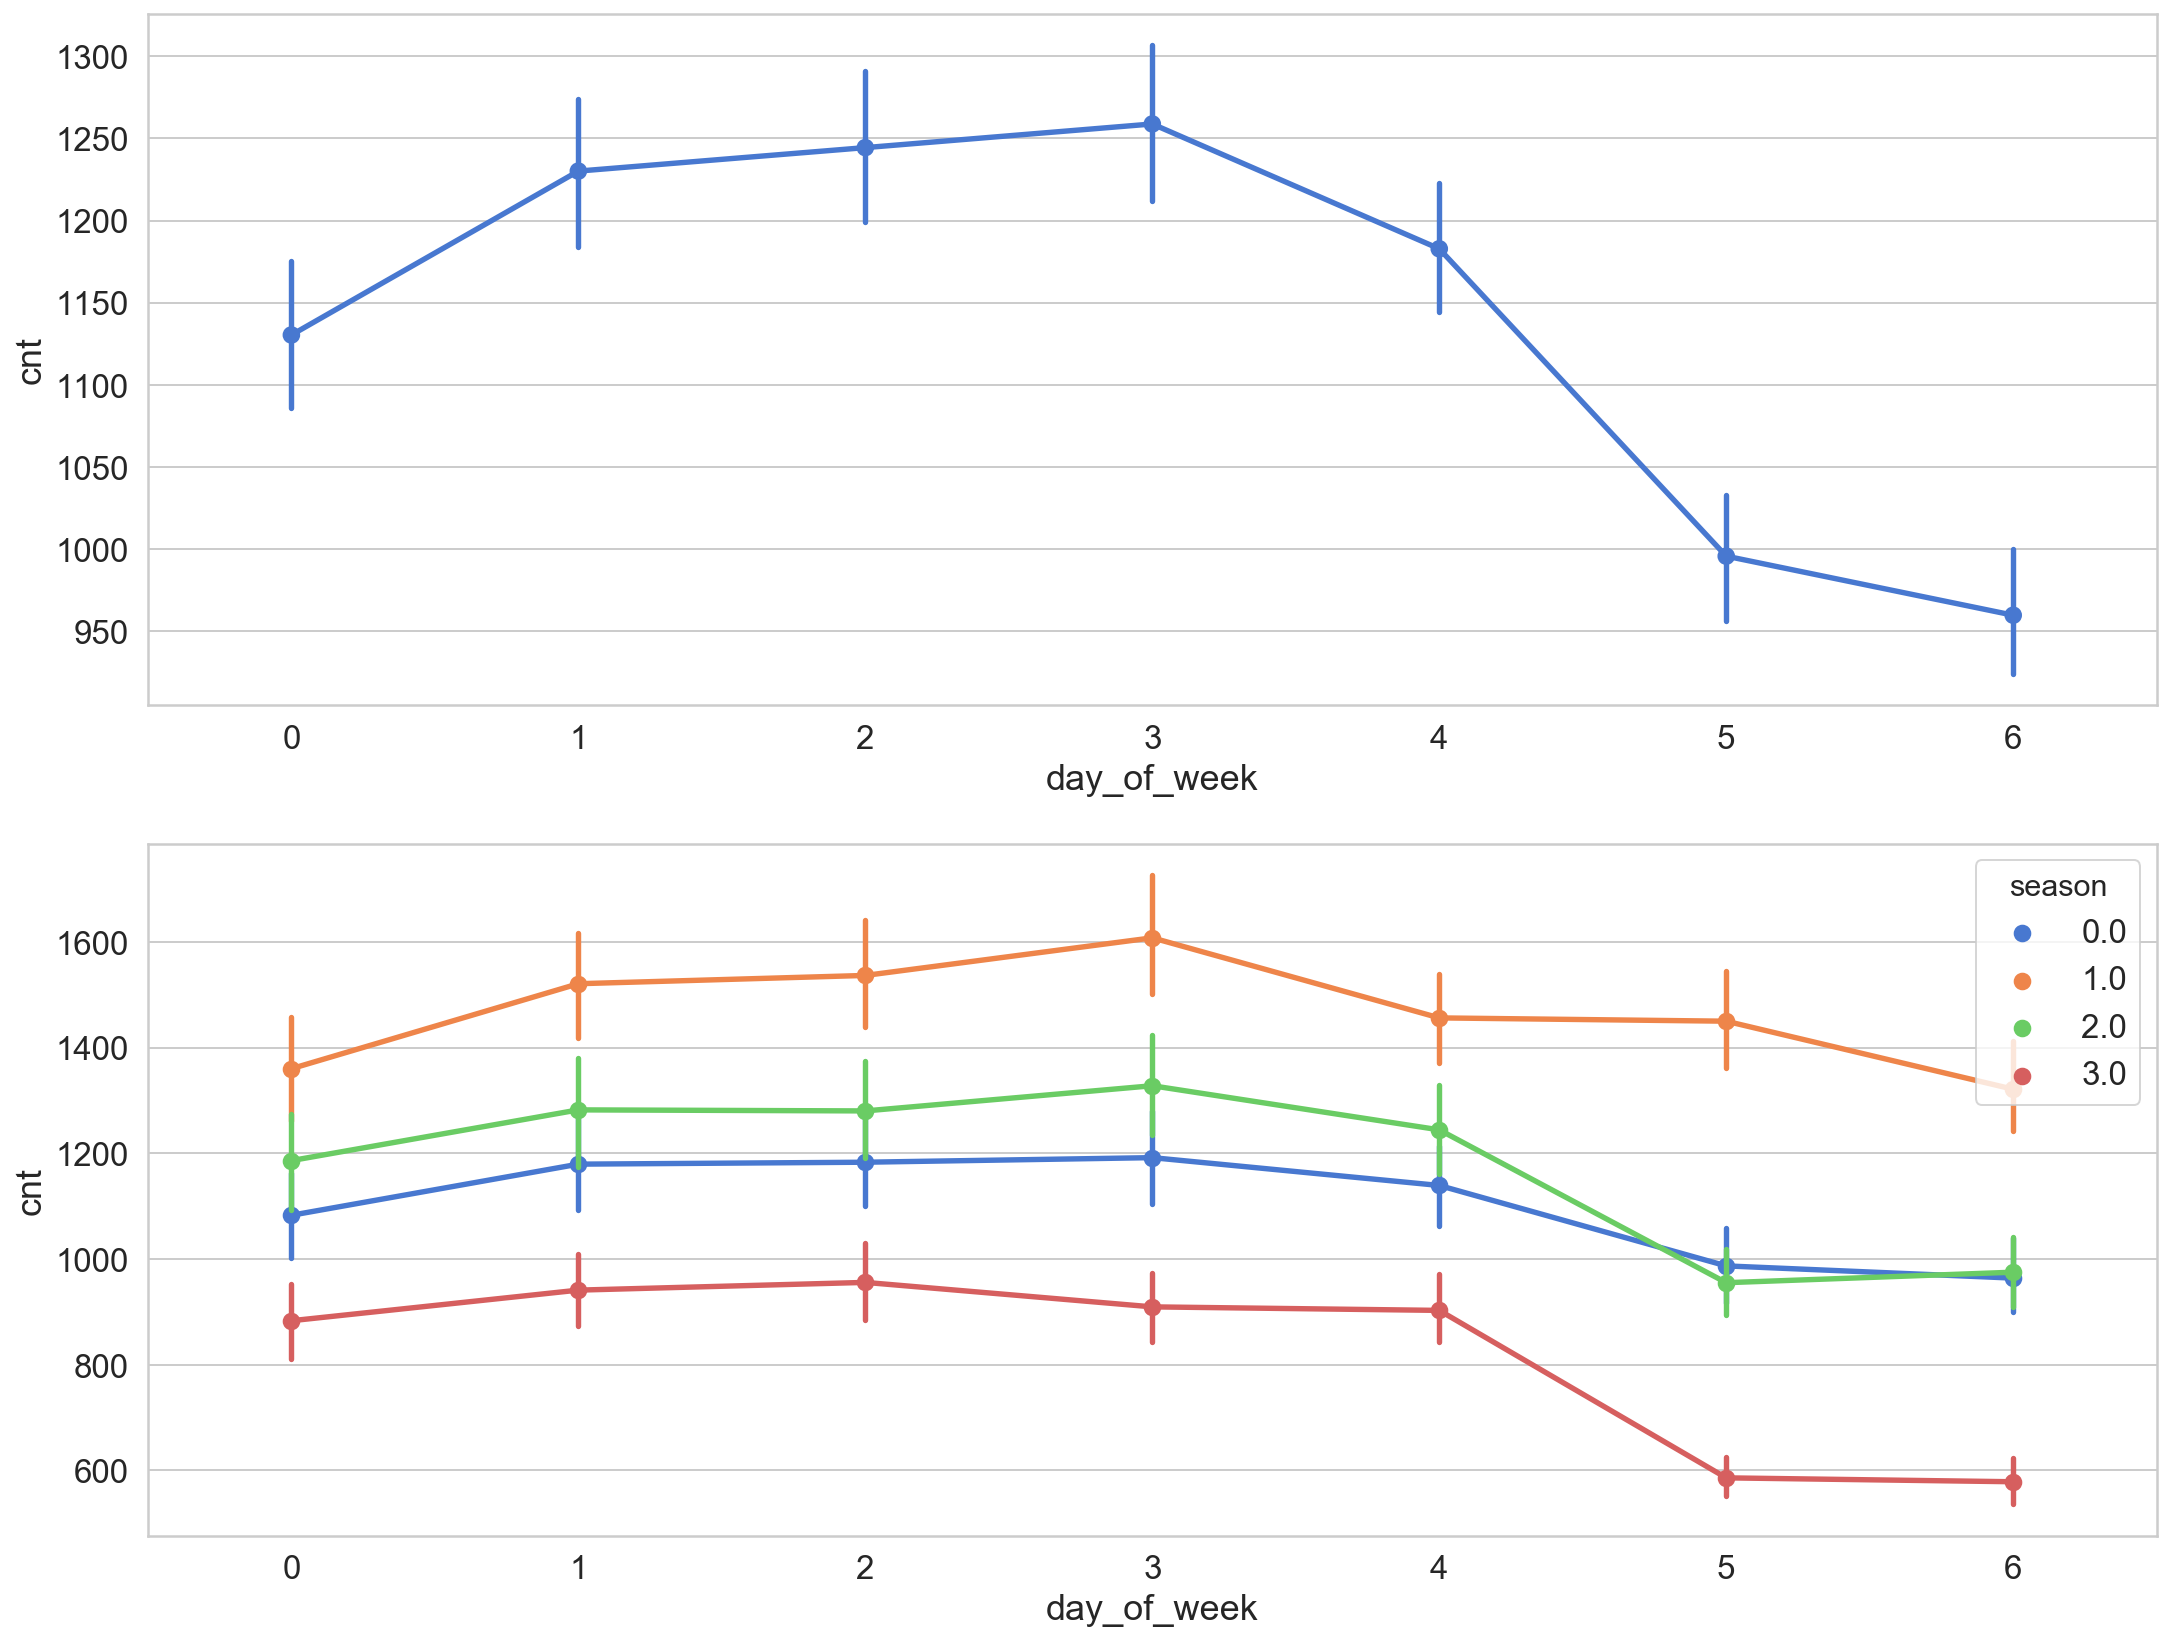

In [10]:
fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(18, 14)

sns.pointplot(data=df, x='day_of_week', y='cnt', ax=ax1)
sns.pointplot(data=df, x='day_of_week', y='cnt', hue='season', ax=ax2);

In [11]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [14]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
print(train.head())

                     cnt      t1        t2    hum  wind_speed  weather_code  \
timestamp                                                                     
2015-01-04 00:00:00  182 -1.2500 -1.047619  0.975   -0.818182           3.0   
2015-01-04 01:00:00  138 -1.2500 -1.000000  0.975   -0.909091           1.0   
2015-01-04 02:00:00  134 -1.3125 -1.000000  1.150   -1.363636           1.0   
2015-01-04 03:00:00   72 -1.3750 -1.047619  1.325   -1.363636           1.0   
2015-01-04 04:00:00   47 -1.3750 -1.238095  0.975   -0.772727           1.0   

                     is_holiday  is_weekend  season  hour  day_of_month  \
timestamp                                                                 
2015-01-04 00:00:00         0.0         1.0     3.0     0             4   
2015-01-04 01:00:00         0.0         1.0     3.0     1             4   
2015-01-04 02:00:00         0.0         1.0     3.0     2             4   
2015-01-04 03:00:00         0.0         1.0     3.0     3             4

In [18]:
cnt_transformer = RobustScaler()

cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, ['cnt']] = cnt_transformer.transform(train[['cnt']])

test.loc[:, ['cnt']] = cnt_transformer.transform(test[['cnt']])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
print(train.head())
print(test.head())

                          cnt      t1        t2    hum  wind_speed  \
timestamp                                                            
2015-01-04 00:00:00 -0.464876 -1.2500 -1.047619  0.975   -0.818182   
2015-01-04 01:00:00 -0.495179 -1.2500 -1.000000  0.975   -0.909091   
2015-01-04 02:00:00 -0.497934 -1.3125 -1.000000  1.150   -1.363636   
2015-01-04 03:00:00 -0.540634 -1.3750 -1.047619  1.325   -1.363636   
2015-01-04 04:00:00 -0.557851 -1.3750 -1.238095  0.975   -0.772727   

                     weather_code  is_holiday  is_weekend  season  hour  \
timestamp                                                                 
2015-01-04 00:00:00           3.0         0.0         1.0     3.0     0   
2015-01-04 01:00:00           1.0         0.0         1.0     3.0     1   
2015-01-04 02:00:00           1.0         0.0         1.0     3.0     2   
2015-01-04 03:00:00           1.0         0.0         1.0     3.0     3   
2015-01-04 04:00:00           1.0         0.0         1.0  

In [20]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [21]:
time_steps = 10

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


In [22]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

441/441 [==============================] - 5s 10ms/step - loss: 0.3270 - val_loss: 0.1255
Epoch 2/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0818 - val_loss: 0.0661
Epoch 3/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0512 - val_loss: 0.0549
Epoch 4/30
441/441 [==============================] - 4s 10ms/step - loss: 0.0389 - val_loss: 0.0356
Epoch 5/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0306 - val_loss: 0.0309
Epoch 

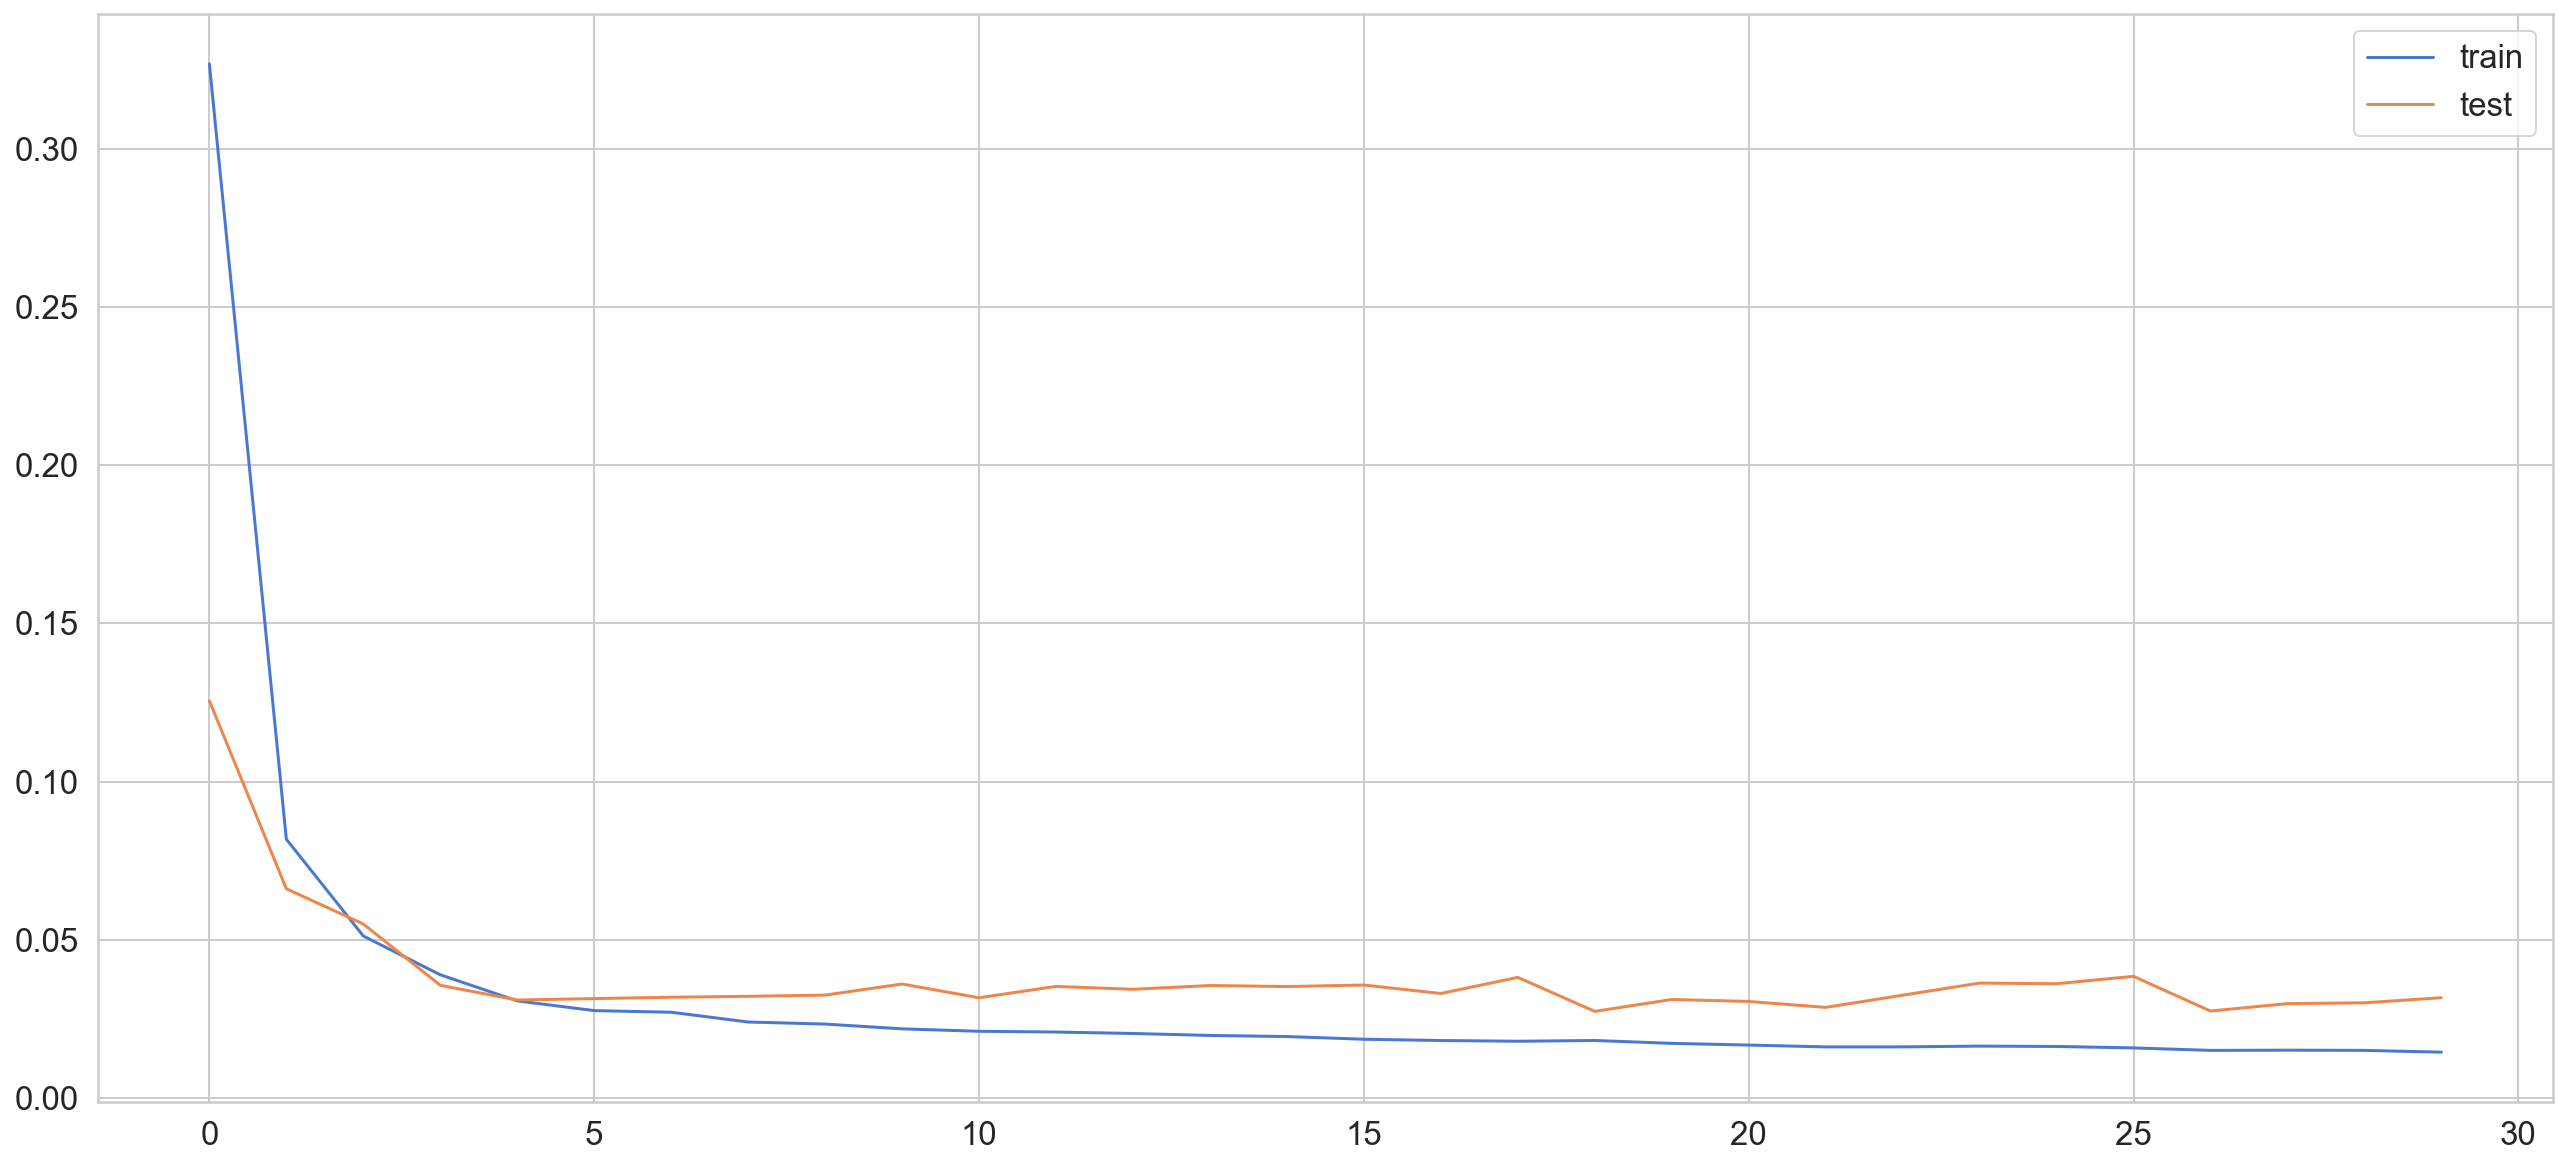

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [25]:
y_pred = model.predict(X_test)
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

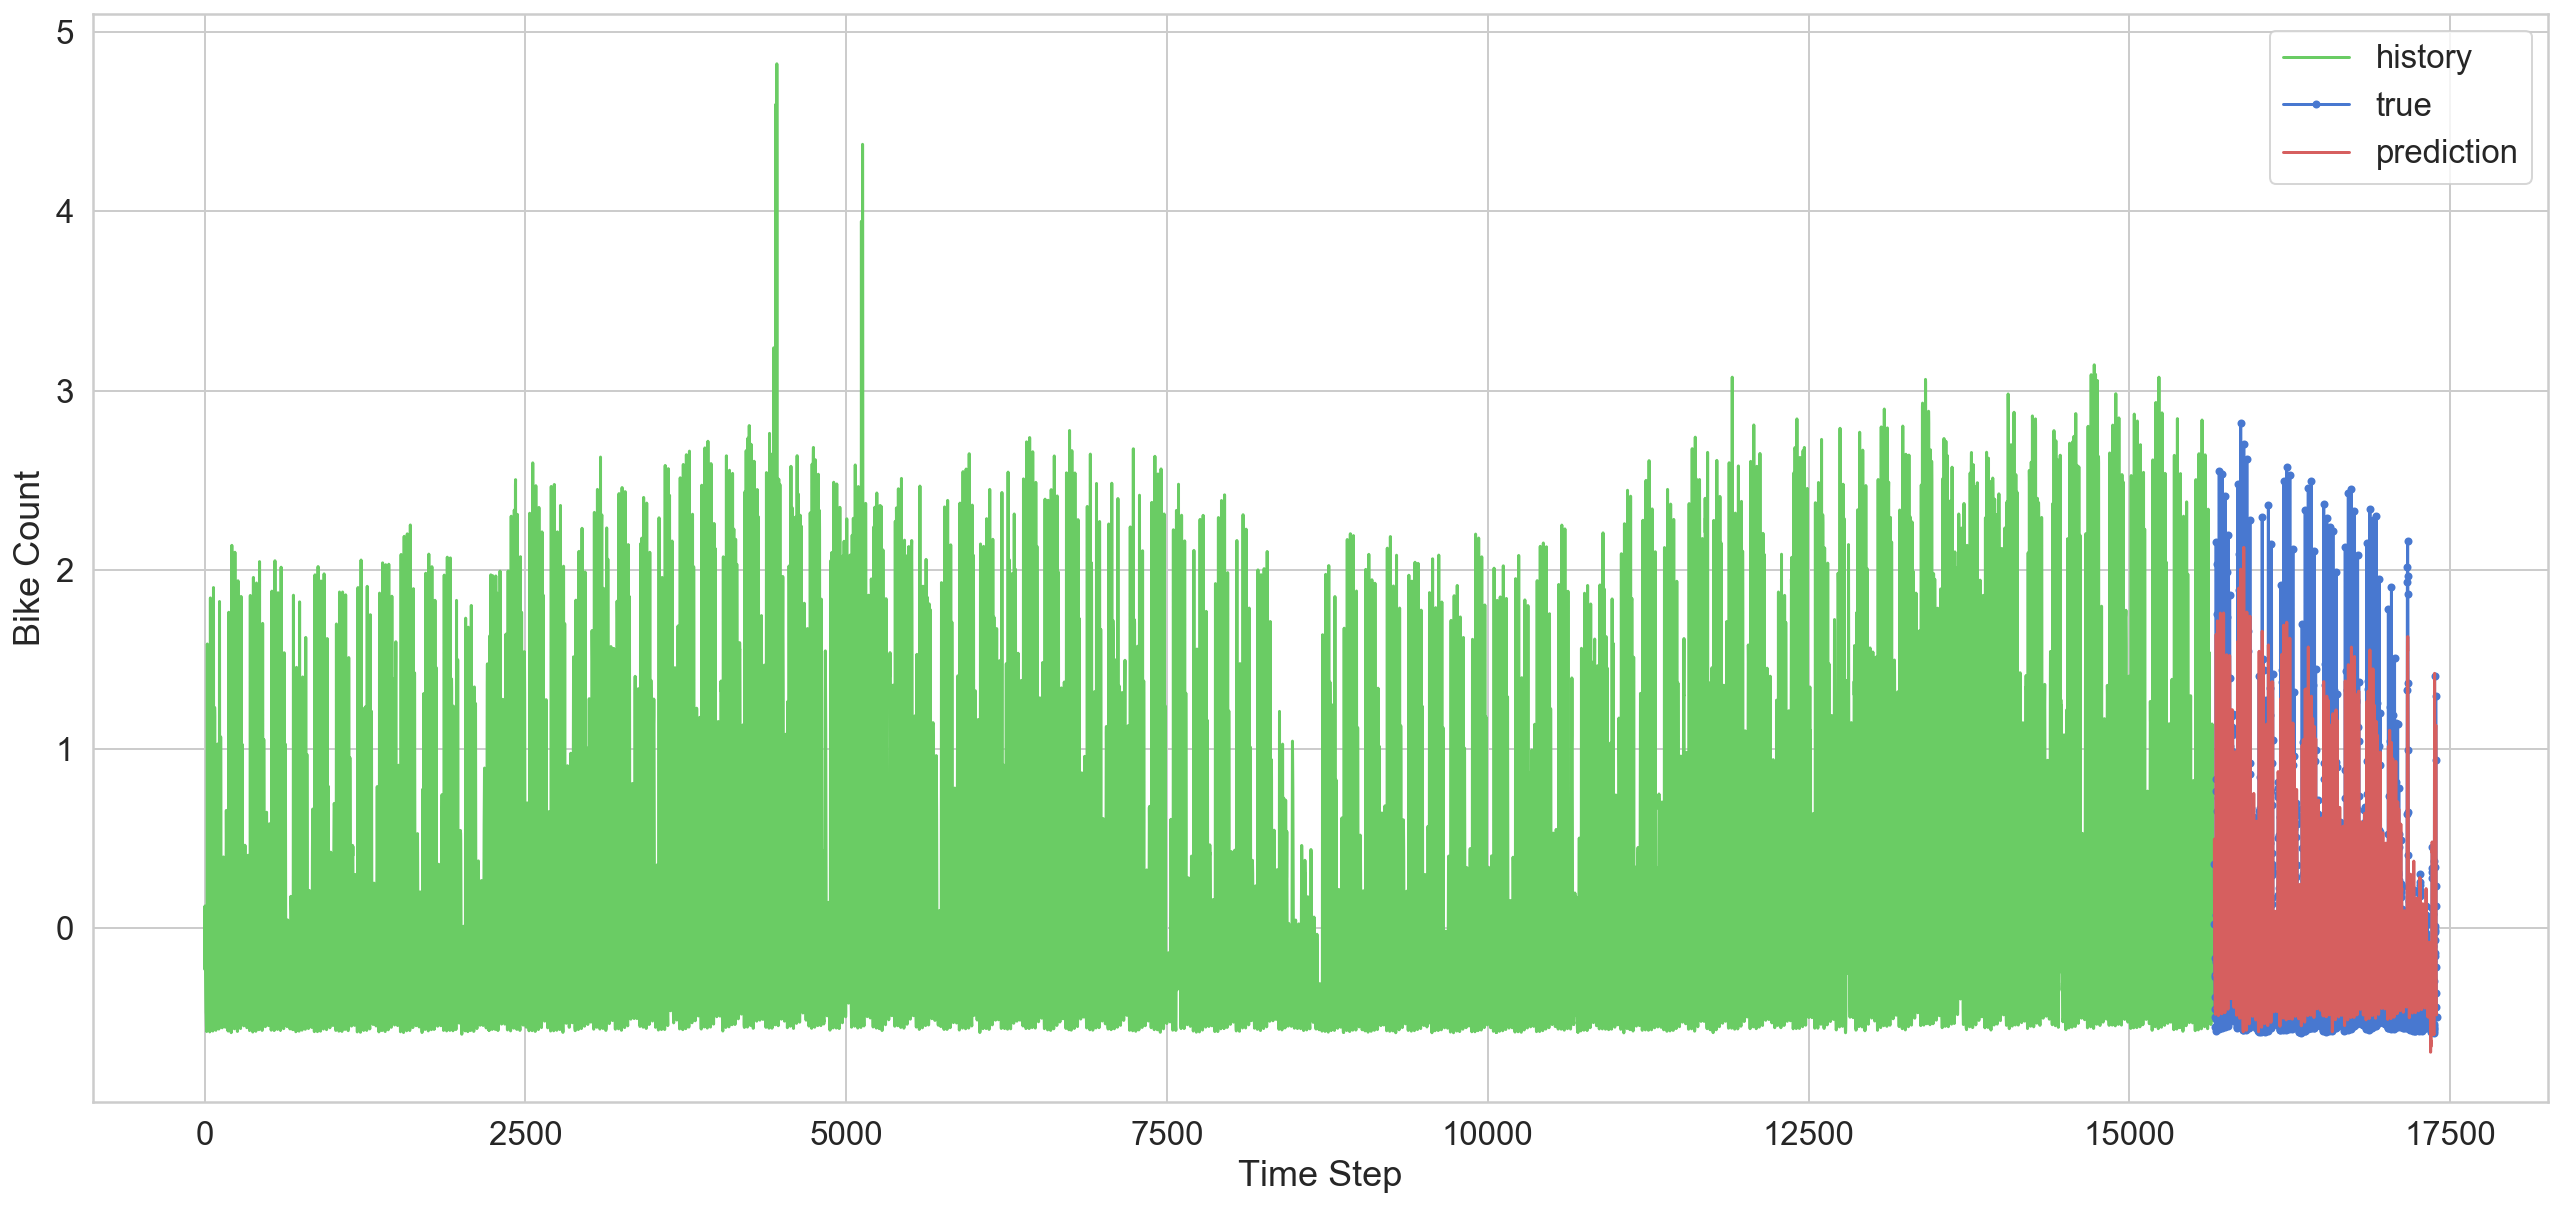

In [26]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

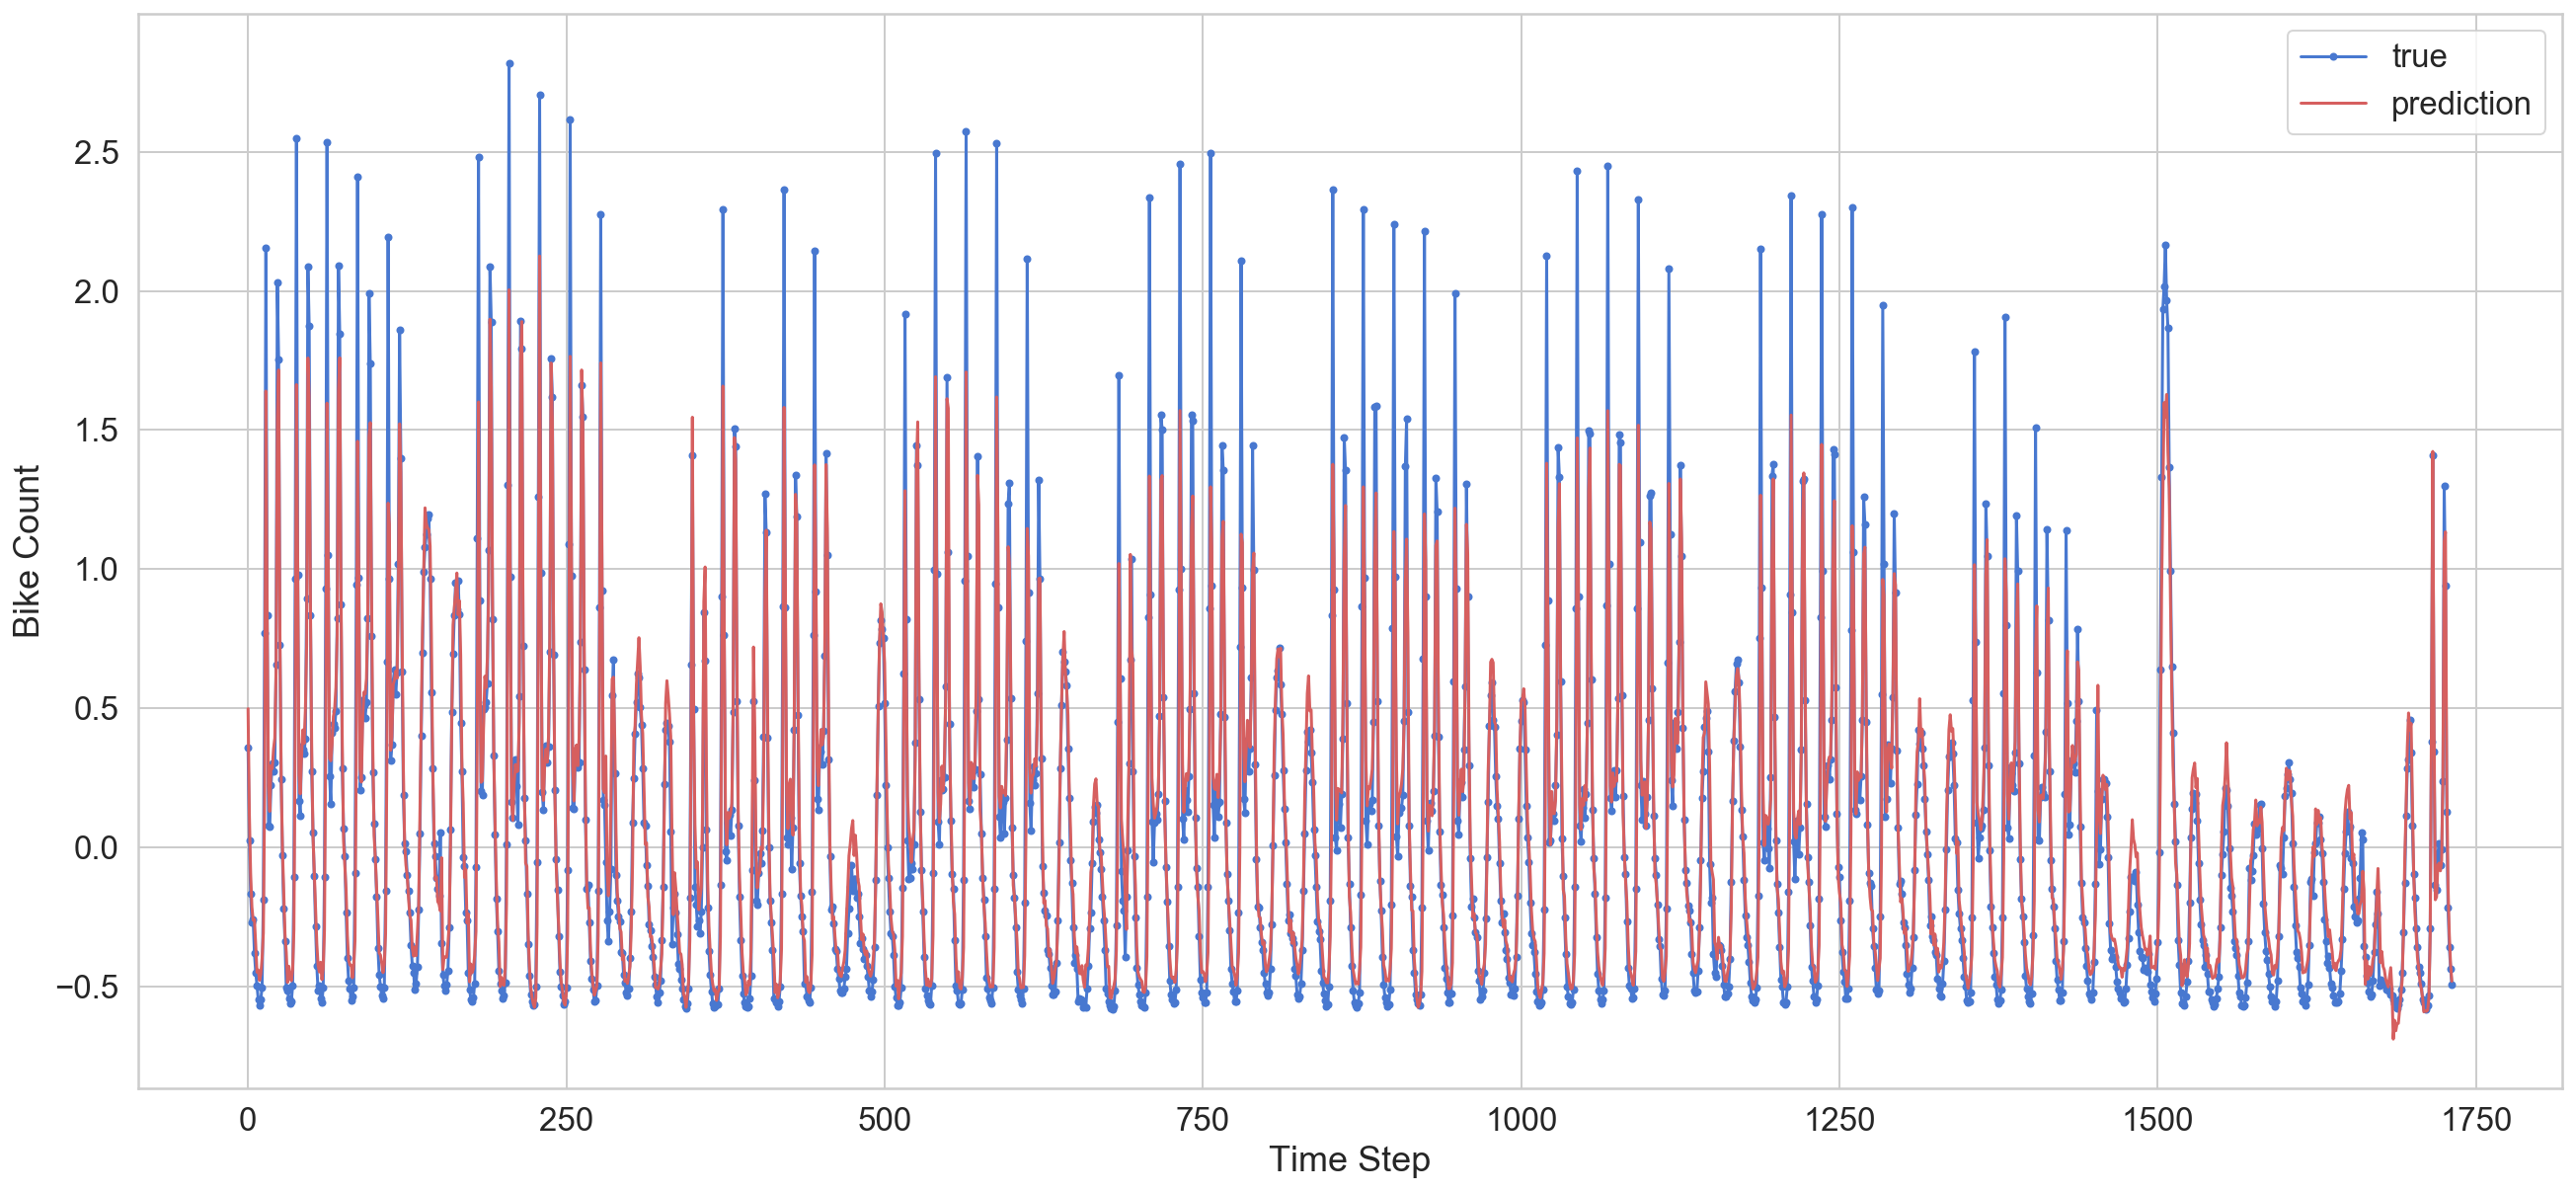

In [27]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();